In [19]:
# Import the libaries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt

In [20]:
#Load Data
company ='ASII.JK'
start = dt.datetime(2012,1,1)
end = dt.datetime(2021,3,22)
data = web.DataReader(company, 'yahoo', start, end)

In [21]:
# Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range (prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [22]:
# Build Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #Predictions of next closing value

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
70/70 [==============================] - 10s 80ms/step - loss: 0.1002
Epoch 2/25
70/70 [==============================] - 6s 81ms/step - loss: 0.0090
Epoch 3/25
70/70 [==============================] - 6s 81ms/step - loss: 0.0075
Epoch 4/25
70/70 [==============================] - 6s 83ms/step - loss: 0.0079
Epoch 5/25
70/70 [==============================] - 6s 84ms/step - loss: 0.0070
Epoch 6/25
70/70 [==============================] - 6s 84ms/step - loss: 0.0060
Epoch 7/25
70/70 [==============================] - 6s 83ms/step - loss: 0.0067
Epoch 8/25
70/70 [==============================] - 6s 84ms/step - loss: 0.0060
Epoch 9/25
70/70 [==============================] - 6s 84ms/step - loss: 0.0055
Epoch 10/25
70/70 [==============================] - 6s 84ms/step - loss: 0.0049
Epoch 11/25
70/70 [==============================] - 6s 84ms/step - loss: 0.0049
Epoch 12/25
70/70 [==============================] - 6s 85ms/step - loss: 0.0045
Epoch 13/25
70/70 [=================

In [23]:
#'''Test The Model Accuracy On Exisisting Data'''
# Load Test Data
test_start = dt.datetime(2012,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

In [24]:
# Make prediction on Test data
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

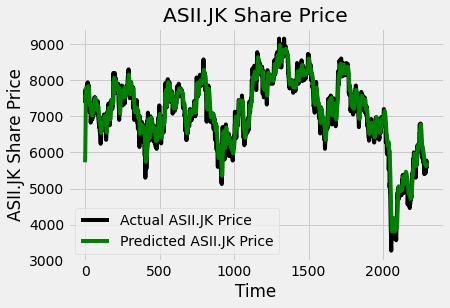

In [25]:
# Plot the test predictions
plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

In [26]:
#Predict Next Day

real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

Prediction: [[5727.145]]
